<a href="https://colab.research.google.com/github/Jenniearul/Linear-regression-/blob/main/Bayesian_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rmse is: 2.9187387807162737


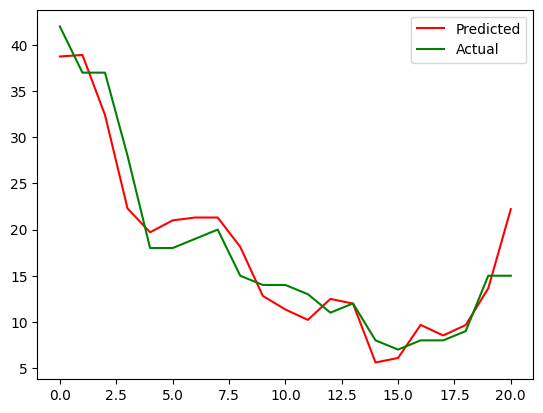

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import scipy.stats as ss

Y1 = np.array([42, 37, 37, 28, 18, 18, 19, 20, 15, 14, 14, 13, 11, 12, 8, 7, 8, 8, 9, 15, 15])
Y = np.matrix(Y1).T

X1 = np.array([[80, 27, 89],
           [80, 27, 88],
           [75, 25, 90],
           [62, 24, 87],
           [62, 22, 87],
           [62, 23, 87],
           [62, 24, 93],
           [62, 24, 93],
           [58, 23, 87],
           [58, 18, 80],
           [58, 18, 89],
           [58, 17, 88],
           [58, 18, 82],
           [58, 19, 93],
           [50, 18, 89],
           [50, 18, 86],
           [50, 19, 72],
           [50, 19, 79],
           [50, 20, 80],
           [56, 20, 82],
           [70, 20, 91]])
X2 = X1.copy()
np.random.seed(1)
T = Y.shape[0]
#Normalise
#for j in range(X1.shape[1]):
#    X1[:,j] = (X1[:,j] - np.mean(X1[:,j]))/np.std(X1[:,j])
X = np.c_[np.ones([T,1]),X1]
K = X.shape[1]


#Prior values
#w_mean_prior = np.array([[0],[0],[0],[0]])
alpha_a_prior = 10**(-3)
alpha_b_prior = 10**(3)
beta_c_prior = 10**(-2)
beta_d_prior = 10**(2)


# define our starting point: [w0 = 10, w=c(0,0, 0), alpha = 0.1, beta = 0.1]

alpha = 0.1
beta = 0.1


#Begin
reps=100   #total numbers of iterations
beta_c = beta_c_prior  + T/2
alpha_a = alpha_a_prior  + K/2

for i in range(reps):
    # For w
    w_cov = inv( np.dot(X.T, X) + alpha*np.eye(K) )
    w_mean = np.dot(w_cov,np.dot(X.T, Y))

    #for beta
    beta_d = beta_d_prior + 0.5 * np.mean(np.power(Y - np.dot(X,w_mean),2)) + 0.5*alpha*np.dot(w_mean.T,w_mean)
    beta = beta_c/beta_d[0,0]

    # for alpha (shrinkage)
    alpha_b = alpha_b_prior + 0.5*(beta*np.dot(w_mean.T,w_mean)+np.trace(w_cov))
    alpha = alpha_a/alpha_b[0,0]

    #print(beta)

pred = np.dot(X,w_mean)
plt.figure()
plt.plot(pred, 'r', label ='Predicted')
plt.plot(Y, 'g', label = 'Actual')
plt.legend()

rmse = np.sqrt(np.sum(np.square(Y-pred))/T)
print ('rmse is:', rmse)